In [21]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [22]:
analysis = scripts.Analysis()

In [23]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band05_wn_980_1100',
                          'P_50_T_250',
                          'min_1.e-26_max_1.e-22_ng_4',
                          'wgt_1_.6_.4_.3',
                          'tropical')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [24]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'h2o',
                               'band05_wn_980_1100',
                               'P_50_T_250',
                               'min_1.e-26_max_1.e-22_ng_4',
                               'wgt_1_.6_.4_.3',
                               'tropical')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [25]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [26]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [27]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [28]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [29]:
fig.display_hrefanchor()

In [30]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [31]:
table_dgdgs.display_hrefanchor()

In [32]:
for g in [1, 2, 3, 4]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

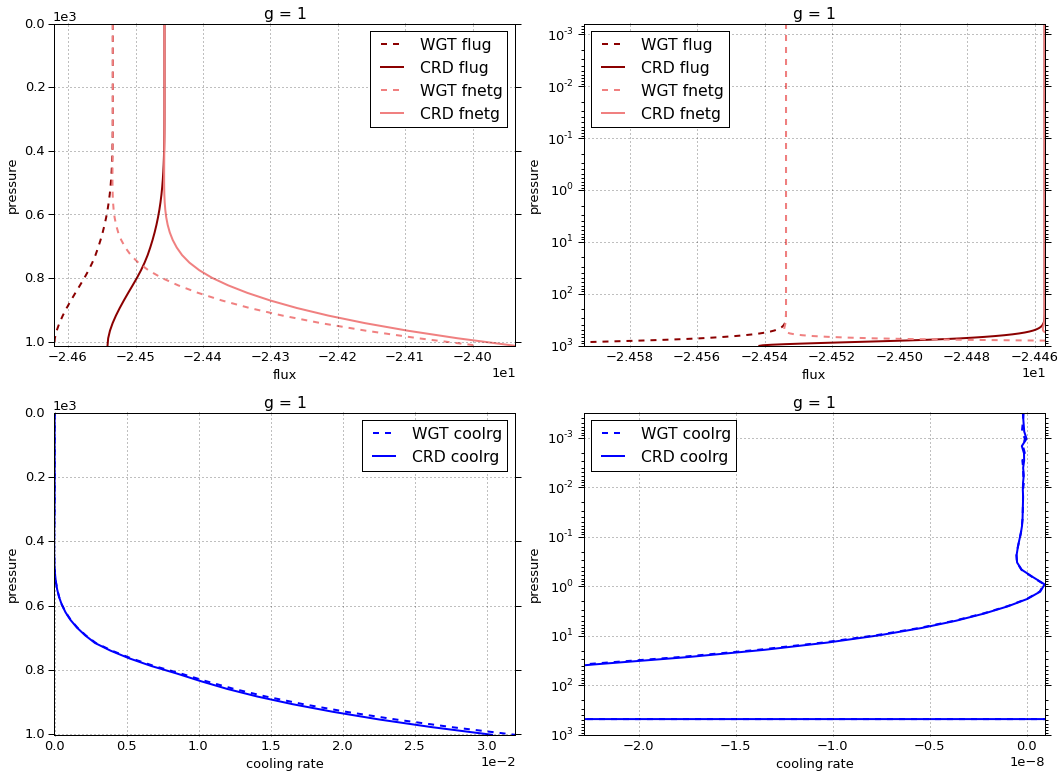

# Figure: flux, cooling rate. g-group 2

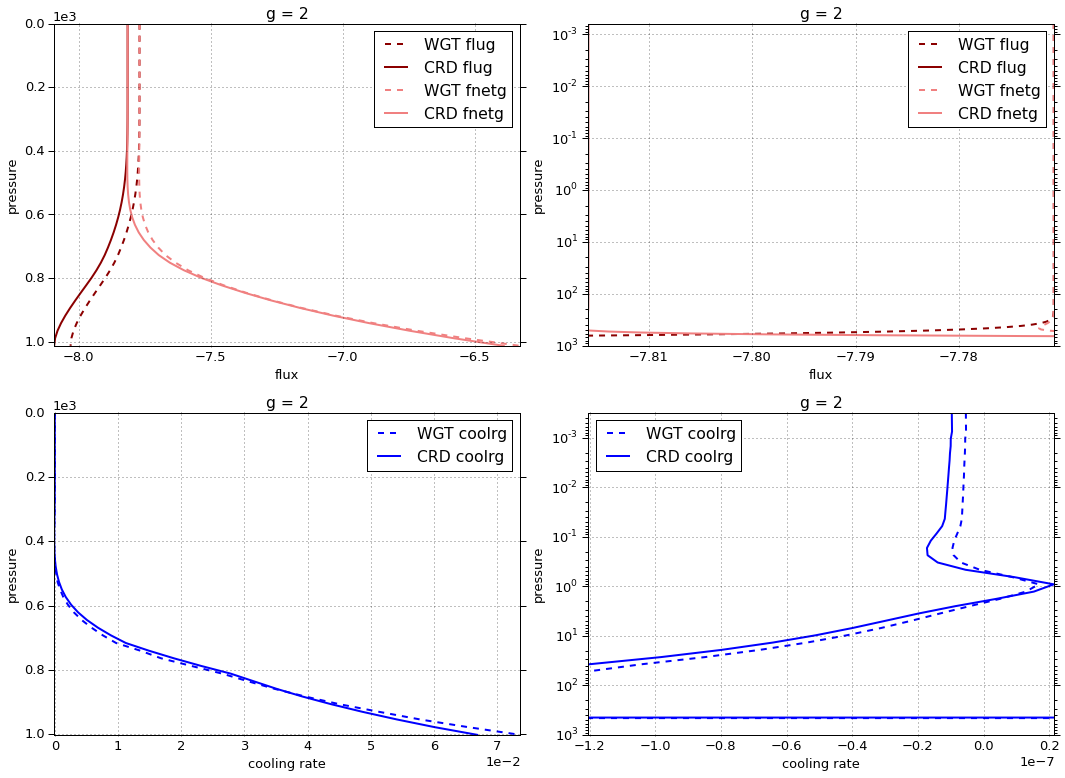

# Figure: flux, cooling rate. g-group 3

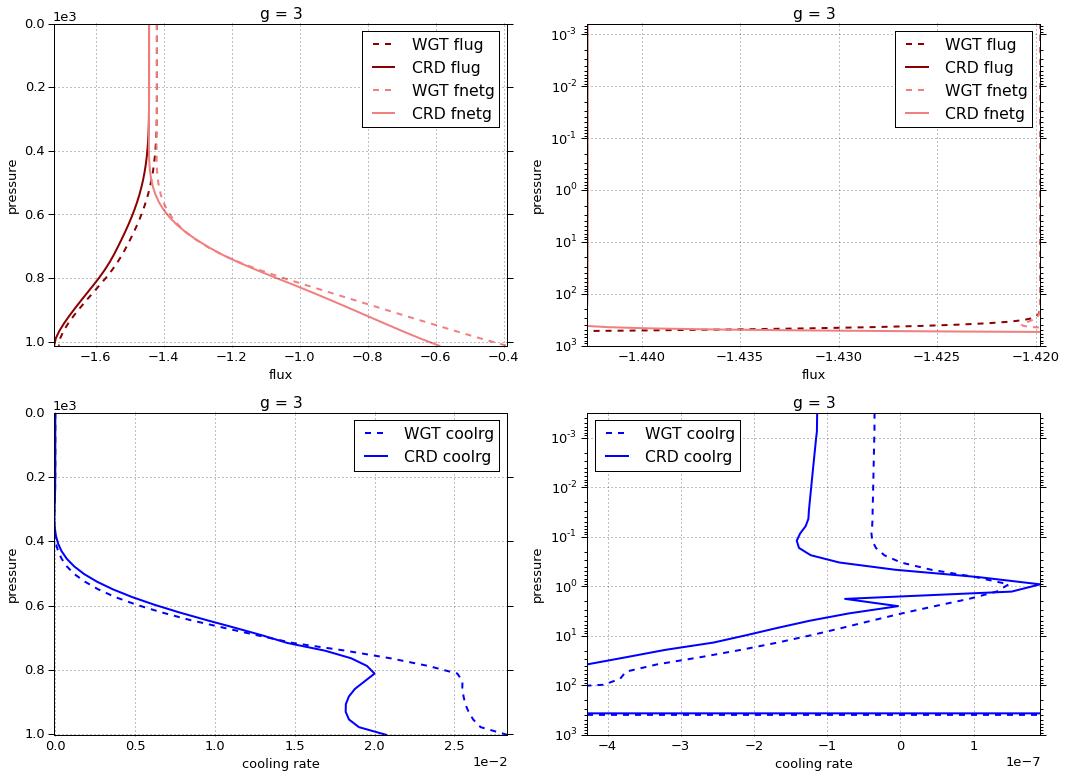

# Figure: flux, cooling rate. g-group 4

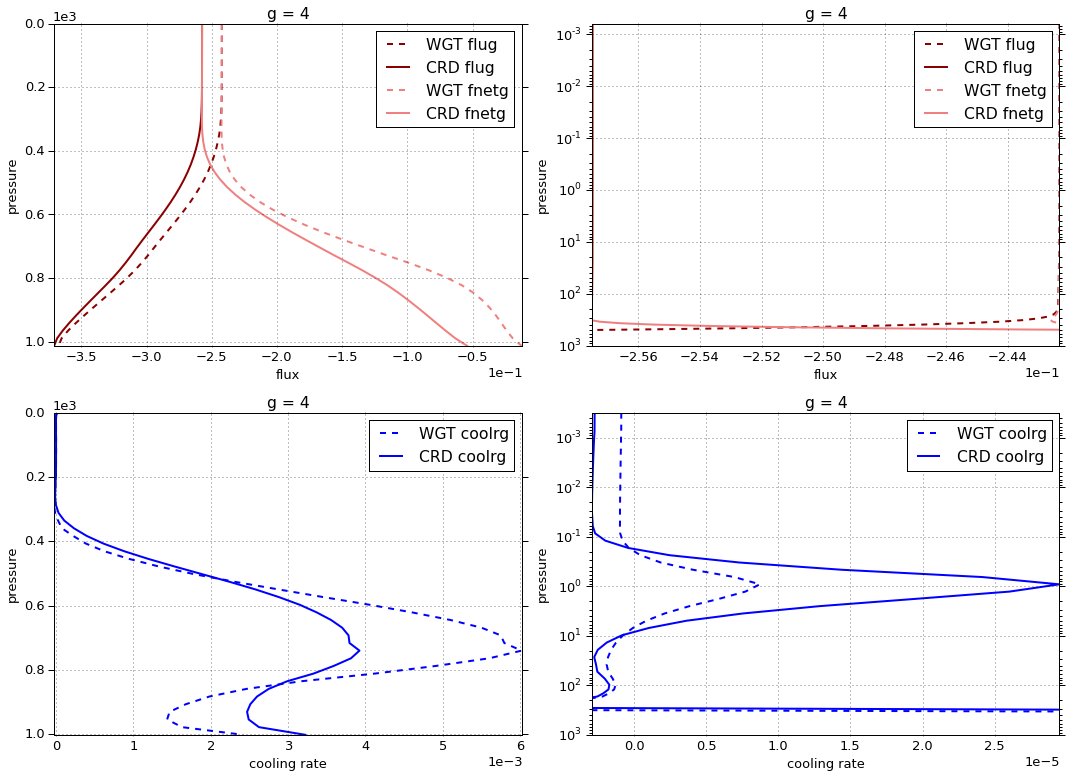

# Figure: flux, cooling rate. g-group total

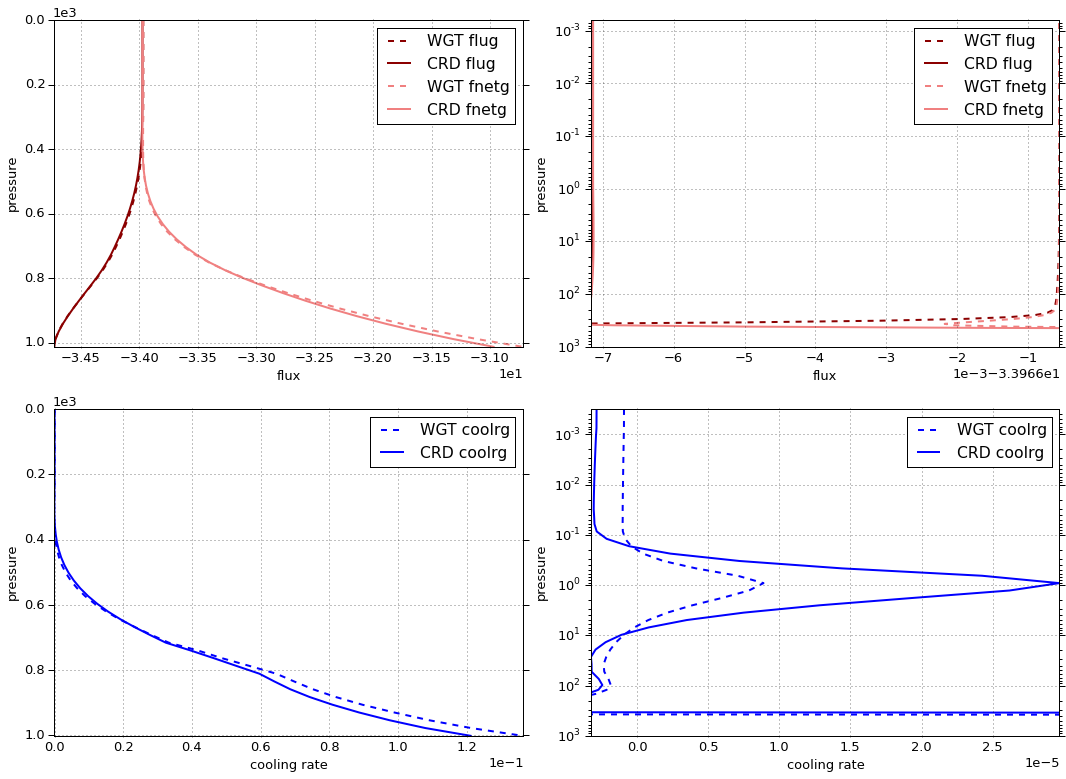

In [33]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [34]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -24.457017  0.000000 -24.457017
  1013     76    -24.541550  0.604825 -23.936725
2 0        1      -7.815875  0.000000  -7.815875
  1013     76     -8.094211  1.703161  -6.391050
3 0        1      -1.442762  0.000000  -1.442762
  1013     76     -1.721946  1.133545  -0.588400
4 0        1      -0.257486  0.000000  -0.257486
  1013     76     -0.370934  0.316701  -0.054233


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -24.533657  0.000000 -24.533657
  1013     76    -24.620712  0.630272 -23.990440
2 0        1      -7.770813  0.000000  -7.770813
  1013     76     -8.032073  1.701963  -6.330110
3 0        1      -1.419764  0.000000  -1.419764
  1013     76     -1.708313  1.318753  -0.389560
4 0        1      -0.242325  0.000000  -0.242325
  1013     76     -0.367542  0.355100  -0.012442


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1     -0.076640  0.000000 -0.076640
  1013     76    -0.079162  0.025447 -0.053715
2 0        1      0.045061  0.000000  0.045061
  1013     76     0.062138 -0.001198  0.060940
3 0        1      0.022999  0.000000  0.022999
  1013     76     0.013633  0.185208  0.198841
4 0        1      0.015161  0.000000  0.015161
  1013     76     0.003391  0.038400  0.041791

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -1.921304e-10
  1001.112500 75     3.037846e-02
2 0.000312    1     -9.678570e-09
  1001.112500 75     6.681491e-02
3 0.000312    1     -1.136902e-07
  1001.112500 75     2.072076e-02
4 0.000312    1     -2.727272e-06
  1001.112500 75     3.222082e-03


WGT


coolrg
g pressure    layer              
1 0.000312    1     -1.440978e-10
  1001.112500 75     3.198365e-02
2 0.000312    1     -5.391660e-09
  1001.112500 75     7.357816e-02
3 0.000312    1     -3.537001e-08
  1001.112500 75     2.830155e-02
4 0.000312    1     -8.817507e-07
  1001.112500 75     2.417702e-03


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      4.803261e-11
  1001.112500 75     1.605190e-03
2 0.000312    1      4.286910e-09
  1001.112500 75     6.763251e-03
3 0.000312    1      7.832017e-08
  1001.112500 75     7.580790e-03
4 0.000312    1      1.845521e-06
  1001.112500 75    -8.043799e-04

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-33.97314,0.000000,-33.973140
1013,76,-34.72864,3.758232,-30.970409



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-33.966559,0.000000,-33.966559
1013,76,-34.728641,4.006089,-30.722552



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,6.581080e-03,0.000000,0.006581
1013,76,-3.800000e-07,0.247857,0.247857


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.000003
1001.112500,75,0.121136



WGT


,,coolrg
pressure,layer,
0.000312,1,-9.226565e-07
1001.112500,75,1.362811e-01



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.000002
1001.112500,75,0.015145


In [35]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.702125,0.708945
2,0.236625,0.231281
3,0.050375,0.049190
4,0.010875,0.010583


In [36]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

wgt                                           crd        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -24.533657  0.000000e+00 -24.533657   1     1   
0.000624      1     2 -24.533657  1.889010e-15 -24.533657   1     2   
0.000876      1     3 -24.533657  2.528519e-15 -24.533657   1     3   
0.001229      1     4 -24.533657  3.168027e-15 -24.533657   1     4   
0.001723      1     5 -24.533657  4.437206e-15 -24.533657   1     5   
0.002417      1     6 -24.533657  6.336055e-15 -24.533657   1     6   
0.003391      1     7 -24.533657  9.504082e-15 -24.533657   1     7   
0.004757      1     8 -24.533657  1.394129e-14 -24.533657   1     8   
0.006672      1     9 -24.533657  2.154652e-14 -24.533657   1     9   
0.009359      1    10 -24.533657  3.293961e-14 -24.533657   1    10   
0.013128      1    11 -24.533657  4.688090e-14 -24.533657   1    11   
0.018415      1    12 -24.533657  7.031644e-14 -24.533657   1    12   
0.025830      1    13 -24.533657  1.051647e-13 -24.533657   1    13   
0.036232      1    14 -24.533657  1.565616e-13 -24.533657   1    14   
0.050823      1    15 -24.533657  2.370708e-13 -24.533657   1    15   
0.071291      1    16 -24.533657  3.854761e-13 -24.533657   1    16   
0.100000      1    17 -24.533657  7.108975e-13 -24.533657   1    17   
0.140271      1    18 -24.533657  1.501291e-12 -24.533657   1    18   
0.196760      1    19 -24.533657  3.451379e-12 -24.533657   1    19   
0.275997      1    20 -24.533657  8.329118e-12 -24.533657   1    20   
0.387100      1    21 -24.533657  2.066231e-11 -24.533657   1    21   
0.543100      1    22 -24.533657  5.211244e-11 -24.533657   1    22   
0.761700      1    23 -24.533657  1.282871e-10 -24.533657   1    23   
1.068500      1    24 -24.533657  2.757922e-10 -24.533657   1    24   
1.498800      1    25 -24.533657  4.992427e-10 -24.533657   1    25   
2.102400      1    26 -24.533657  8.164417e-10 -24.533657   1    26   
2.949000      1    27 -24.533657  1.248884e-09 -24.533657   1    27   
4.136600      1    28 -24.533657  1.841972e-09 -24.533657   1    28   
5.802500      1    29 -24.533657  2.671849e-09 -24.533657   1    29   
8.139200      1    30 -24.533657  3.849962e-09 -24.533657   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -24.533761  3.963553e-05 -24.533722   1    47   
347.300000    1    48 -24.533853  8.400945e-05 -24.533769   1    48   
371.075000    1    49 -24.534001  1.655311e-04 -24.533836   1    49   
394.850000    1    50 -24.534217  2.989746e-04 -24.533918   1    50   
418.625000    1    51 -24.534520  5.099577e-04 -24.534011   1    51   
442.400000    1    52 -24.534936  8.335085e-04 -24.534102   1    52   
466.175000    1    53 -24.535491  1.316536e-03 -24.534174   1    53   
489.950000    1    54 -24.536215  2.020859e-03 -24.534194   1    54   
513.725000    1    55 -24.537137  3.024909e-03 -24.534112   1    55   
537.500000    1    56 -24.538298  4.430237e-03 -24.533867   1    56   
561.275000    1    57 -24.539726  6.362341e-03 -24.533364   1    57   
585.050000    1    58 -24.541455  8.976442e-03 -24.532479   1    58   
608.825000    1    59 -24.543514  1.246369e-02 -24.531051   1    59   
632.600000    1    60 -24.545927  1.705032e-02 -24.528877   1    60   
656.375000    1    61 -24.548712  2.300755e-02 -24.525704   1    61   
680.150000    1    62 -24.551879  3.064290e-02 -24.521236   1    62   
703.925000    1    63 -24.555433  4.028510e-02 -24.515148   1    63   
727.700000    1    64 -24.559394  5.231653e-02 -24.507078   1    64   
751.475000    1    65 -24.564105  6.822233e-02 -24.495883   1    65   
775.250000    1    66 -24.569561  8.862897e-02 -24.480932   1    66   
799.025000    1    67 -24.575707  1.141996e-01 -24.461507   1    67   
822.800000    1    68 -24.582422  1.456458e-01 -24.436776   1    68   
846.575000    1    69 -24.589218  1.

In [37]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      2     1 -7.770813  0.000000e+00 -7.770813   2     1 -7.815875   
0.000624      2     2 -7.770813  6.778819e-14 -7.770813   2     2 -7.815875   
0.000876      2     3 -7.770813  9.585834e-14 -7.770813   2     3 -7.815875   
0.001229      2     4 -7.770813  1.365971e-13 -7.770813   2     4 -7.815875   
0.001723      2     5 -7.770813  1.958796e-13 -7.770813   2     5 -7.815875   
0.002417      2     6 -7.770813  2.830991e-13 -7.770813   2     6 -7.815875   
0.003391      2     7 -7.770813  4.106096e-13 -7.770813   2     7 -7.815875   
0.004757      2     8 -7.770813  5.972230e-13 -7.770813   2     8 -7.815875   
0.006672      2     9 -7.770813  8.700094e-13 -7.770813   2     9 -7.815875   
0.009359      2    10 -7.770813  1.269469e-12 -7.770813   2    10 -7.815875   
0.013128      2    11 -7.770813  1.854700e-12 -7.770813   2    11 -7.815875   
0.018415      2    12 -7.770813  2.712494e-12 -7.770813   2    12 -7.815875   
0.025830      2    13 -7.770813  3.970979e-12 -7.770813   2    13 -7.815875   
0.036232      2    14 -7.770813  5.820082e-12 -7.770813   2    14 -7.815875   
0.050823      2    15 -7.770813  8.604658e-12 -7.770813   2    15 -7.815875   
0.071291      2    16 -7.770813  1.335281e-11 -7.770813   2    16 -7.815875   
0.100000      2    17 -7.770813  2.292263e-11 -7.770813   2    17 -7.815875   
0.140271      2    18 -7.770813  4.368944e-11 -7.770813   2    18 -7.815875   
0.196760      2    19 -7.770813  8.942706e-11 -7.770813   2    19 -7.815875   
0.275997      2    20 -7.770813  1.910462e-10 -7.770813   2    20 -7.815875   
0.387100      2    21 -7.770813  4.189832e-10 -7.770813   2    21 -7.815875   
0.543100      2    22 -7.770813  9.345269e-10 -7.770813   2    22 -7.815875   
0.761700      2    23 -7.770813  2.045986e-09 -7.770813   2    23 -7.815875   
1.068500      2    24 -7.770813  3.974381e-09 -7.770813   2    24 -7.815875   
1.498800      2    25 -7.770813  6.576398e-09 -7.770813   2    25 -7.815875   
2.102400      2    26 -7.770814  9.831113e-09 -7.770813   2    26 -7.815875   
2.949000      2    27 -7.770814  1.372409e-08 -7.770813   2    27 -7.815875   
4.136600      2    28 -7.770814  1.844011e-08 -7.770813   2    28 -7.815875   
5.802500      2    29 -7.770814  2.435541e-08 -7.770813   2    29 -7.815875   
8.139200      2    30 -7.770814  3.201551e-08 -7.770814   2    30 -7.815875   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    2    47 -7.771208  1.613580e-04 -7.771047   2    47 -7.816318   
347.300000    2    48 -7.771547  3.392281e-04 -7.771207   2    48 -7.816696   
371.075000    2    49 -7.772088  6.630244e-04 -7.771425   2    49 -7.817299   
394.850000    2    50 -7.772895  1.188134e-03 -7.771707   2    50 -7.818163   
418.625000    2    51 -7.773974  2.010523e-03 -7.771964   2    51 -7.819359   
442.400000    2    52 -7.775432  3.259527e-03 -7.772173   2    52 -7.820970   
466.175000    2    53 -7.777351  5.105735e-03 -7.772246   2    53 -7.823086   
489.950000    2    54 -7.779821  7.770391e-03 -7.772051   2    54 -7.825803   
513.725000    2    55 -7.782930  1.152902e-02 -7.771401   2    55 -7.829213   
537.500000    2    56 -7.786894  1.673211e-02 -7.770162   2    56 -7.833414   
561.275000    2    57 -7.791625  2.380315e-02 -7.767822   2    57 -7.838495   
585.050000    2    58 -7.797270  3.325353e-02 -7.764017   2    58 -7.844530   
608.825000    2    59 -7.803865  4.569637e-02 -7.758169   2    59 -7.851584   
632.600000    2    60 -7.811481  6.183260e-02 -7.749648   2    60 -7.859691   
656.375000    2    61 -7.820111  8.247177e-02 -7.737639   2    61 -7.868865   
680.150000    2    62 -7.829736  1.084845e-01 -7.721252   2    62 -7.879092   
703.925000    2    63 -7.840561  1.407324e-01 -7.699828   2   

In [38]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      3     1 -1.419764  0.000000e+00 -1.419764   3     1 -1.442762   
0.000624      3     2 -1.419764  5.745206e-13 -1.419764   3     2 -1.442762   
0.000876      3     3 -1.419764  8.105144e-13 -1.419764   3     3 -1.442762   
0.001229      3     4 -1.419764  1.151578e-12 -1.419764   3     4 -1.442762   
0.001723      3     5 -1.419764  1.647059e-12 -1.419764   3     5 -1.442762   
0.002417      3     6 -1.419764  2.366623e-12 -1.419764   3     6 -1.442762   
0.003391      3     7 -1.419764  3.411893e-12 -1.419764   3     7 -1.442762   
0.004757      3     8 -1.419764  4.930258e-12 -1.419764   3     8 -1.442762   
0.006672      3     9 -1.419764  7.136130e-12 -1.419764   3     9 -1.442762   
0.009359      3    10 -1.419764  1.034142e-11 -1.419764   3    10 -1.442762   
0.013128      3    11 -1.419764  1.500012e-11 -1.419764   3    11 -1.442762   
0.018415      3    12 -1.419764  2.177395e-11 -1.419764   3    12 -1.442762   
0.025830      3    13 -1.419764  3.162862e-11 -1.419764   3    13 -1.442762   
0.036232      3    14 -1.419764  4.599325e-11 -1.419764   3    14 -1.442762   
0.050823      3    15 -1.419764  6.737569e-11 -1.419764   3    15 -1.442762   
0.071291      3    16 -1.419764  1.026291e-10 -1.419764   3    16 -1.442762   
0.100000      3    17 -1.419764  1.692900e-10 -1.419764   3    17 -1.442762   
0.140271      3    18 -1.419764  3.038243e-10 -1.419764   3    18 -1.442762   
0.196760      3    19 -1.419764  5.798300e-10 -1.419764   3    19 -1.442762   
0.275997      3    20 -1.419764  1.152486e-09 -1.419764   3    20 -1.442762   
0.387100      3    21 -1.419764  2.355749e-09 -1.419764   3    21 -1.442762   
0.543100      3    22 -1.419764  4.914239e-09 -1.419764   3    22 -1.442762   
0.761700      3    23 -1.419764  1.014741e-08 -1.419764   3    23 -1.442762   
1.068500      3    24 -1.419764  1.907543e-08 -1.419764   3    24 -1.442762   
1.498800      3    25 -1.419764  3.128360e-08 -1.419764   3    25 -1.442762   
2.102400      3    26 -1.419764  4.685186e-08 -1.419764   3    26 -1.442763   
2.949000      3    27 -1.419764  6.582085e-08 -1.419764   3    27 -1.442763   
4.136600      3    28 -1.419764  8.899762e-08 -1.419764   3    28 -1.442763   
5.802500      3    29 -1.419764  1.179851e-07 -1.419764   3    29 -1.442763   
8.139200      3    30 -1.419764  1.550669e-07 -1.419764   3    30 -1.442763   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    3    47 -1.420636  4.590144e-04 -1.420177   3    47 -1.443772   
347.300000    3    48 -1.421322  9.413468e-04 -1.420380   3    48 -1.444558   
371.075000    3    49 -1.422379  1.795210e-03 -1.420584   3    49 -1.445759   
394.850000    3    50 -1.423852  3.140955e-03 -1.420711   3    50 -1.447399   
418.625000    3    51 -1.425803  5.187394e-03 -1.420615   3    51 -1.449563   
442.400000    3    52 -1.428322  8.201180e-03 -1.420120   3    52 -1.452344   
466.175000    3    53 -1.431506  1.251272e-02 -1.418993   3    53 -1.455823   
489.950000    3    54 -1.435468  1.851977e-02 -1.416948   3    54 -1.460073   
513.725000    3    55 -1.440207  2.662966e-02 -1.413577   3    55 -1.465159   
537.500000    3    56 -1.445874  3.755606e-02 -1.408318   3    56 -1.471122   
561.275000    3    57 -1.452480  5.176581e-02 -1.400714   3    57 -1.477989   
585.050000    3    58 -1.459999  6.987129e-02 -1.390128   3    58 -1.485750   
608.825000    3    59 -1.468433  9.260989e-02 -1.375823   3    59 -1.494371   
632.600000    3    60 -1.477775  1.207157e-01 -1.357059   3    60 -1.503778   
656.375000    3    61 -1.487924  1.546511e-01 -1.333273   3    61 -1.513855   
680.150000    3    62 -1.498838  1.952294e-01 -1.303609   3    62 -1.524460   
703.925000    3    63 -1.510356  2.424135e-01 -1.267943   3   

In [39]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -0.242325  0.000000e+00 -0.242325   4     1 -0.257486   
0.000624      4     2 -0.242325  2.096231e-11 -0.242325   4     2 -0.257486   
0.000876      4     3 -0.242325  2.960688e-11 -0.242325   4     3 -0.257486   
0.001229      4     4 -0.242325  4.220150e-11 -0.242325   4     4 -0.257486   
0.001723      4     5 -0.242325  6.064838e-11 -0.242325   4     5 -0.257486   
0.002417      4     6 -0.242325  8.765120e-11 -0.242325   4     6 -0.257486   
0.003391      4     7 -0.242325  1.271794e-10 -0.242325   4     7 -0.257486   
0.004757      4     8 -0.242325  1.850399e-10 -0.242325   4     8 -0.257486   
0.006672      4     9 -0.242325  2.697259e-10 -0.242325   4     9 -0.257486   
0.009359      4    10 -0.242325  3.936731e-10 -0.242325   4    10 -0.257486   
0.013128      4    11 -0.242325  5.750799e-10 -0.242325   4    11 -0.257486   
0.018415      4    12 -0.242325  8.405974e-10 -0.242325   4    12 -0.257486   
0.025830      4    13 -0.242325  1.229261e-09 -0.242325   4    13 -0.257486   
0.036232      4    14 -0.242325  1.798965e-09 -0.242325   4    14 -0.257486   
0.050823      4    15 -0.242325  2.652687e-09 -0.242325   4    15 -0.257486   
0.071291      4    16 -0.242325  4.098132e-09 -0.242325   4    16 -0.257486   
0.100000      4    17 -0.242325  6.964220e-09 -0.242325   4    17 -0.257486   
0.140271      4    18 -0.242325  1.299544e-08 -0.242325   4    18 -0.257486   
0.196760      4    19 -0.242325  2.567370e-08 -0.242325   4    19 -0.257486   
0.275997      4    20 -0.242325  5.210060e-08 -0.242325   4    20 -0.257486   
0.387100      4    21 -0.242325  1.067142e-07 -0.242324   4    21 -0.257486   
0.543100      4    22 -0.242325  2.184400e-07 -0.242324   4    22 -0.257486   
0.761700      4    23 -0.242325  4.342016e-07 -0.242324   4    23 -0.257486   
1.068500      4    24 -0.242325  7.827032e-07 -0.242324   4    24 -0.257486   
1.498800      4    25 -0.242325  1.236049e-06 -0.242324   4    25 -0.257486   
2.102400      4    26 -0.242325  1.778903e-06 -0.242323   4    26 -0.257486   
2.949000      4    27 -0.242325  2.387630e-06 -0.242323   4    27 -0.257487   
4.136600      4    28 -0.242325  3.055858e-06 -0.242322   4    28 -0.257488   
5.802500      4    29 -0.242326  3.790686e-06 -0.242322   4    29 -0.257489   
8.139200      4    30 -0.242327  4.602816e-06 -0.242322   4    30 -0.257491   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -0.243501  8.959376e-04 -0.242605   4    47 -0.258814   
347.300000    4    48 -0.244255  1.717292e-03 -0.242538   4    48 -0.259637   
371.075000    4    49 -0.245401  3.071688e-03 -0.242329   4    49 -0.260789   
394.850000    4    50 -0.246785  5.070815e-03 -0.241714   4    50 -0.262234   
418.625000    4    51 -0.248512  7.877652e-03 -0.240634   4    51 -0.263998   
442.400000    4    52 -0.250599  1.171334e-02 -0.238885   4    52 -0.266093   
466.175000    4    53 -0.253055  1.681851e-02 -0.236236   4    53 -0.268531   
489.950000    4    54 -0.255890  2.339331e-02 -0.232497   4    54 -0.271313   
513.725000    4    55 -0.259115  3.164133e-02 -0.227474   4    55 -0.274427   
537.500000    4    56 -0.262702  4.173492e-02 -0.220967   4    56 -0.277863   
561.275000    4    57 -0.266611  5.374791e-02 -0.212863   4    57 -0.281597   
585.050000    4    58 -0.270857  6.772736e-02 -0.203130   4    58 -0.285595   
608.825000    4    59 -0.275333  8.361800e-02 -0.191715   4    59 -0.289816   
632.600000    4    60 -0.280007  1.012591e-01 -0.178748   4    60 -0.294201   
656.375000    4    61 -0.284778  1.204053e-01 -0.164372   4    61 -0.298667   
680.150000    4    62 -0.289541  1.406644e-01 -0.148877   4    62 -0.303119   
703.925000    4    63 -0.294208  1.615302e-01 -0.132678   4   

In [40]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')